<a href="https://colab.research.google.com/github/AdakMahato/ML/blob/main/ML_Week_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Multiclass Logistic Regression: Implement Multiclass Logistic Regression
(step-by step) on Iris dataset using one vs. rest strategy?

In [ ]:
from sklearn import datasets

iris = datasets.load_iris()

In [ ]:
import pandas as pd

In [ ]:
# Convert to DataFrame
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# Add the target (species) to the DataFrame
iris_df['species'] = iris.target

In [ ]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
# Check for null values in the DataFrame
null_values = iris_df.isnull().sum()

# Display the result
print(null_values)


sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(iris_df.drop(columns='species'), iris_df['species'], test_size=0.2, random_state=42)

# Create the logistic regression model with the one-vs-rest (ovr) strategy
log_reg = LogisticRegression(multi_class='ovr', max_iter=200)

# Train the model
log_reg.fit(X_train, y_train)

# Make predictions on the test data
y_pred = log_reg.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy * 100:.2f}%")


Accuracy: 96.67%


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


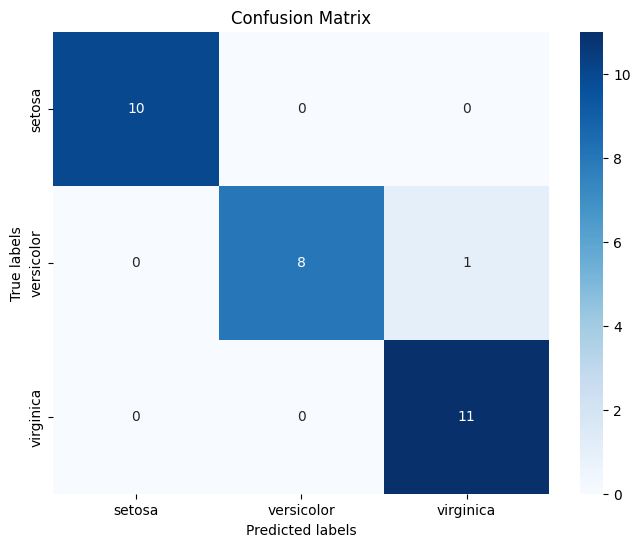

In [ ]:
# Import the confusion matrix function
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Create the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()



#Use the weather dataset to implement the decision tree. Try differentavailable parameters of the inbuilt method.

In [ ]:
wedf=pd.read_csv('/content/weather.csv')

In [ ]:
wedf.head()

,Outlook,Temp,Humidity,Windy,Play
0,rainy,hot,high,0,0
1,rainy,hot,high,1,0
2,overcast,hot,high,0,1
3,sunny,mild,high,0,1
4,sunny,cool,normal,0,1


In [ ]:
# Apply one-hot encoding
df_encoded = pd.get_dummies(wedf, columns=['Outlook', 'Temp', 'Humidity']).astype(int)

In [ ]:
df_encoded.head()

,Windy,Play,Outlook_overcast,Outlook_rainy,Outlook_sunny,Temp_cool,Temp_hot,Temp_mild,Humidity_high,Humidity_normal
0,0,0,0,1,0,0,1,0,1,0
1,1,0,0,1,0,0,1,0,1,0
2,0,1,1,0,0,0,1,0,1,0
3,0,1,0,0,1,0,0,1,1,0
4,0,1,0,0,1,1,0,0,0,1


In [ ]:
y=df_encoded['Play']
x=df_encoded.drop(columns='Play',axis=1)

In [ ]:
x.head()

,Windy,Outlook_overcast,Outlook_rainy,Outlook_sunny,Temp_cool,Temp_hot,Temp_mild,Humidity_high,Humidity_normal
0,0,0,1,0,0,1,0,1,0
1,1,0,1,0,0,1,0,1,0
2,0,1,0,0,0,1,0,1,0
3,0,0,0,1,0,0,1,1,0
4,0,0,0,1,1,0,0,0,1


In [ ]:
y.head()

,Play
0,0
1,0
2,1
3,1
4,1


In [ ]:
from sklearn.model_selection import train_test_split
# Split data into training and test sets
train_data, test_data, train_output,test_output = train_test_split(x,y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
treemodel=DecisionTreeClassifier()

In [ ]:
treemodels=DecisionTreeClassifier(criterion="entropy")

In [ ]:
treemodels.fit(train_data,train_output)

DecisionTreeClassifier(criterion='entropy')

In [ ]:
treemodel.fit(train_data,train_output)

DecisionTreeClassifier()

[Text(0.6, 0.9, 'x[1] <= 0.5\ngini = 0.463\nsamples = 11\nvalue = [4, 7]'),
 Text(0.5, 0.7, 'x[8] <= 0.5\ngini = 0.5\nsamples = 8\nvalue = [4, 4]'),
 Text(0.55, 0.8, 'True  '),
 Text(0.3, 0.5, 'x[2] <= 0.5\ngini = 0.375\nsamples = 4\nvalue = [3, 1]'),
 Text(0.2, 0.3, 'x[0] <= 0.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.1, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.3, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.4, 0.3, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.7, 0.5, 'x[3] <= 0.5\ngini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 Text(0.6, 0.3, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.8, 0.3, 'x[0] <= 0.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.7, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.9, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.7, 0.7, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.6499999999999999, 0.8, '  False')]

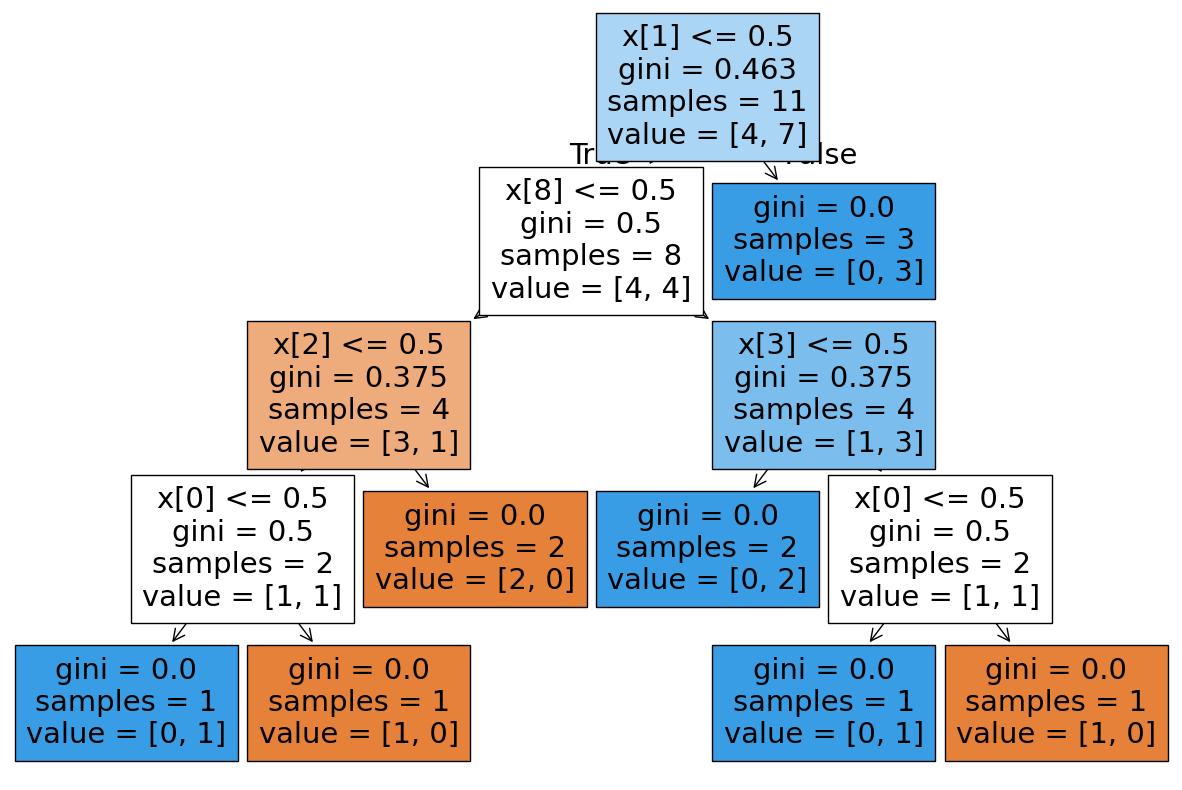

In [ ]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(treemodel,filled=True)

[Text(0.6, 0.9, 'x[1] <= 0.5\nentropy = 0.946\nsamples = 11\nvalue = [4, 7]'),
 Text(0.5, 0.7, 'x[8] <= 0.5\nentropy = 1.0\nsamples = 8\nvalue = [4, 4]'),
 Text(0.55, 0.8, 'True  '),
 Text(0.3, 0.5, 'x[2] <= 0.5\nentropy = 0.811\nsamples = 4\nvalue = [3, 1]'),
 Text(0.2, 0.3, 'x[0] <= 0.5\nentropy = 1.0\nsamples = 2\nvalue = [1, 1]'),
 Text(0.1, 0.1, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.3, 0.1, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.4, 0.3, 'entropy = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.7, 0.5, 'x[3] <= 0.5\nentropy = 0.811\nsamples = 4\nvalue = [1, 3]'),
 Text(0.6, 0.3, 'entropy = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.8, 0.3, 'x[0] <= 0.5\nentropy = 1.0\nsamples = 2\nvalue = [1, 1]'),
 Text(0.7, 0.1, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.9, 0.1, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.7, 0.7, 'entropy = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.6499999999999999, 0.8, '  False')]

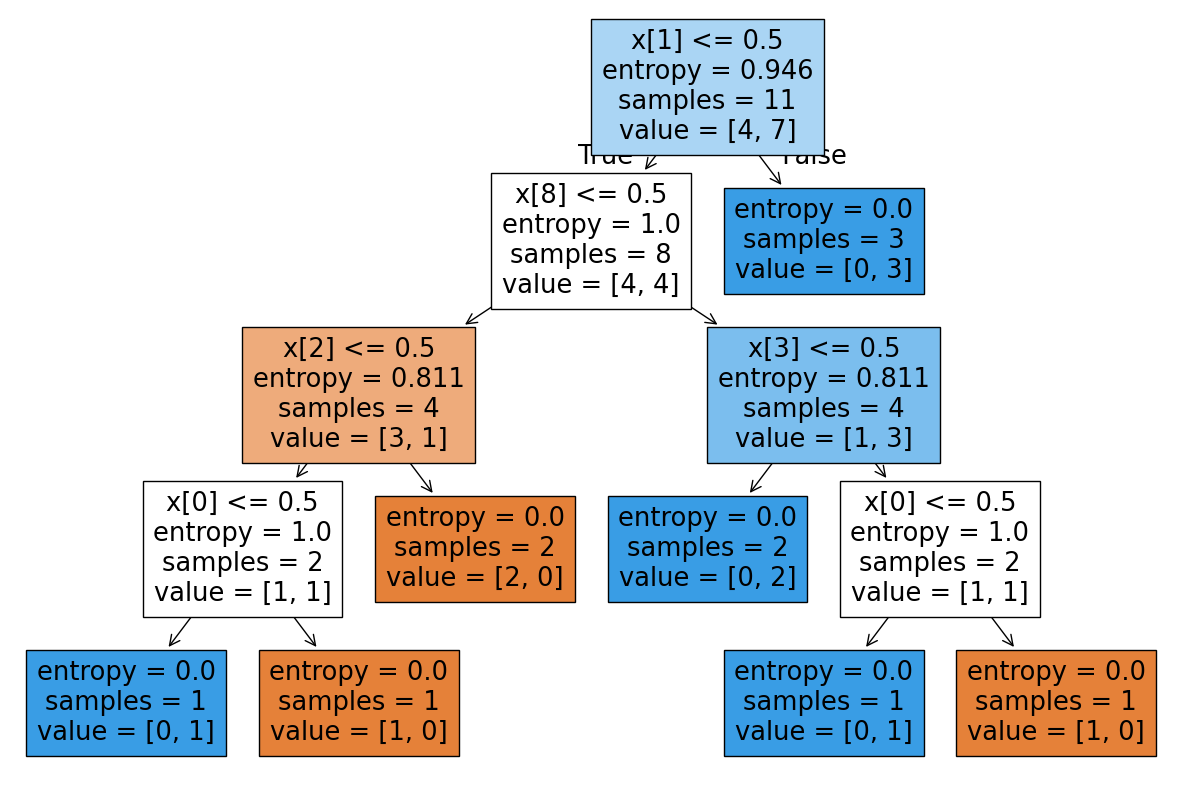

In [ ]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(treemodels,filled=True)

In [ ]:
pred=treemodel.predict(test_data)

In [ ]:



accuracy = accuracy_score(test_output,pred)
print("Accuracy:", accuracy)



Accuracy: 1.0


In [ ]:
print(test_data.shape)
print(pred.shape)


(3,)
(3,)


In [ ]:
import numpy as np


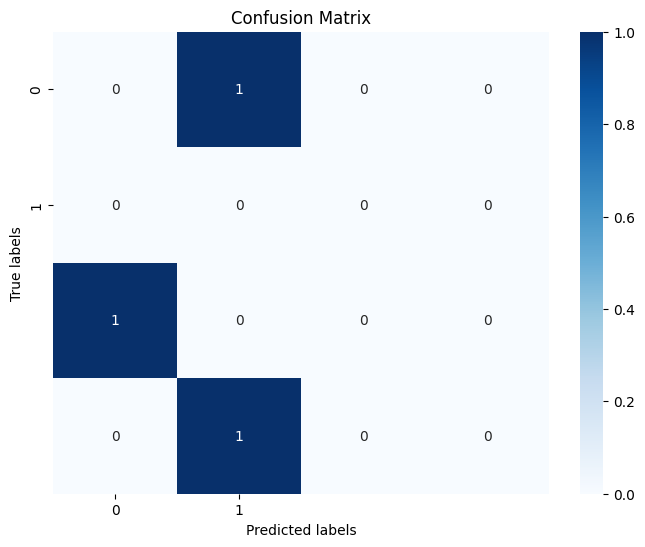

In [ ]:
# No need for np.argmax since both test_data and pred are 1D arrays
conf_matrix = confusion_matrix(test_data, pred)

# Plot the confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', xticklabels=[0, 1], yticklabels=[0, 1])
plt.title('Confusion Matrix')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()


#Download the Bank Note Authentication Dataset from the following link
https://drive.google.com/file/d/12r4j7yjGC4s_TigKEHyISSY1NSPzF3eX/view?usp=sharing
The dataset contains following four input features computed from
400X400 images of bank notes:
1. variance of Wavelet Transformed image (continuous)
2. skewness of Wavelet Transformed image (continuous)
3. Curtosis of Wavelet Transformed image (continuous)
4. entropy of image (continuous)
Each instance is labelled as fake (label 0) or authentic (label 1).
For the given dataset, implement Decision Tree-based CART algorithm

Accuracy: 98.06%


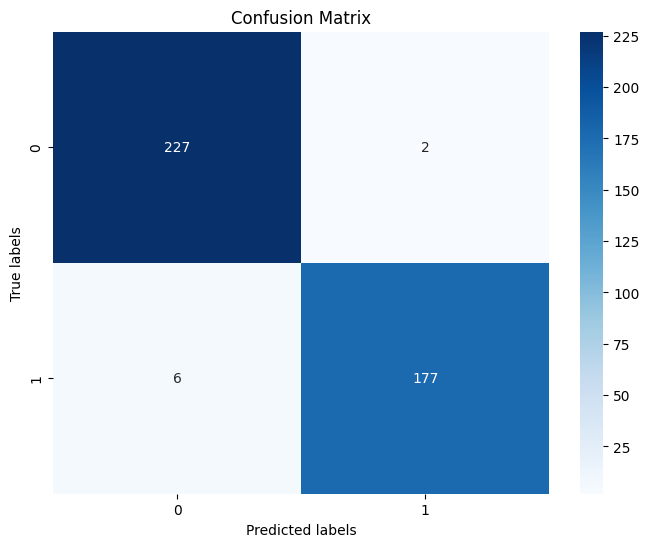

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

url = 'https://drive.google.com/uc?id=12r4j7yjGC4s_TigKEHyISSY1NSPzF3eX'  # Direct download link
data = pd.read_csv(url)

data.columns = ['Variance', 'Skewness', 'Curtosis', 'Entropy', 'Class']

# Split data into features (X) and labels (y)
X = data[['Variance', 'Skewness', 'Curtosis', 'Entropy']]
y = data['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

clf = DecisionTreeClassifier(criterion='gini', random_state=42)  # CART uses 'gini' by default
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', xticklabels=[0, 1], yticklabels=[0, 1])
plt.title('Confusion Matrix')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()


In [ ]:
data

,Variance,Skewness,Curtosis,Entropy,Class
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1
